<a href="https://colab.research.google.com/github/Patortiz26/IN6531-Miner-a-de-datos-2021-2/blob/main/Laboratorio_3_IN6531.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1>Laboratorio N°3</center></h1>

<center><strong>IN6531: Introducción a la Minería de Datos - Primavera 2021</strong></center>

##Presentación

###Cuerpo Docente:

- Profesor: Richard Weber
- Auxiliar: Patricio Ortiz
- Ayudantes: Felipe Arias, Walter Guzman, Esteban Rojas

###Declaración de compromiso ético

Nosotros **Integrante 1, Integrante 2 e Integrante 3** declaramos que realizamos de manera grupal los pasos de la presente actividad. También declaramos no incurrir en copia, ni compartir nuestras respuestas con otras personas ni con otros grupos. Por lo que, ratificamos que las respuestas son de nuestra propia confección y reflejan nuestro propio conocimiento.

### Reglas:

- Fecha de entrega: 4 días desde la publicación, 3 días de atraso con 1 punto de descuento c/u. Pueden utilizar días bonus sin descuento.
- **Grupos de máximo 3 personas**.
- Para trabajar este laboratorio edite este documento `.ipynb` agregando sus respuestas donde corresponda.
- Para cada pregunta, cuando corresponda, incluya el código fuente que utilizó para llegar a su respuesta.
- El formato de entrega para esta actividad debe ser un archivo `.ipynb` el cual debe ser subido a U-Cursos. Basta con que uno de los integrantes haga la entrega. Si más integrantes hacen una entrega en U-Cursos, se revisará cualquiera de éstas.
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias. En caso de sospecha de copia se activaran los protocolos correspondientes.
- Pueden usar cualquer material del curso que estimen conveniente.






### Objetivos del lab: 

- Demostrar suficiencia de conocimientos teoricos respecto a clustering.
- Aplicar modelo K-means.
- Aplicar modelos de clustering jerarquico.
- Mostrar manejo de habilidades frente a un "caso real"

##Preguntas teoricas (1.0 Puntos)

Cada pregunta "pesa" lo mismo en la asignación de nota, es decir, 2 décimas. Al final hay una pregunta bonus, esta sólo aplica sobre el puntaje de esta sección, i.e. si en esta sección tienen puntaje perfecto, el puntaje del bonus no se suma al puntaje de las preguntas prácticas.

P1.- ¿Cual es la diferencia entre un modelo supervisado y un modelo no-supervisado?

**Respuesta:**


P2.- ¿Cuales son los objetivos que persigue el clustering?

**Respuesta:**


P3.- Explique, en sus palabras, el funcionamiento de los algoritmos aglomerativos.

**Respuesta:**


P4.- Describa una ventaja y desventaja de los siguientes métodos de clustering:
* K-Means
* Clustering Jerarquico Aglomerativo

**Respuesta:**

P5.- Explique el funcionamiento del "método del codo". 

**Respuesta:**

##Preguntas prácticas (5.0 Puntos)



###Problema "dirigido" (3.0 Puntos)

Para esta parte usaremos el dataset de cantidad de denuncias por 100 mil habitantes por tipo de delito desde el año 2001 al 2016 en Chile (Fuente: http://www.seguridadpublica.gov.cl/estadisticas/tasa-de-denuncias-y-detenciones/delitos-de-mayor-connotacion-social-series-de-datos-2001-2017/).

Ejecute el siguiete código para cargar el dataset:

In [ ]:
import pandas as pd
import numpy as np

dataframe = pd.read_csv("https://users.dcc.uchile.cl/~hsarmien/mineria/datasets/denuncias-2001-2016.txt", sep=" ")
dataframe

,comuna,anio,homicidios,hurtos,robo_lugar,robo_sorpresa,robo_vehiculo,robo_violencia,violacion
1,Arica,2001,1.6,370.3,NaN,9.5,NaN,107.2,16.4
2,Arica,2002,1.1,346.7,NaN,34.0,NaN,122.8,14.9
3,Arica,2003,1.6,460.1,464.4,52.8,172.2,196.2,15.5
4,Arica,2004,1.1,452.2,395.0,64.1,203.7,143.8,13.9
5,Arica,2005,0.0,421.8,287.8,58.4,144.2,144.7,7.5
...,...,...,...,...,...,...,...,...,...
5532,Peñaflor,2012,1.1,375.0,436.5,78.6,59.3,191.5,14.8
5533,Peñaflor,2013,0.0,370.0,408.1,107.6,77.4,213.0,14.6
5534,Peñaflor,2014,1.1,301.3,376.3,112.6,65.1,224.0,5.5
5535,Peñaflor,2015,0.0,321.6,334.7,111.9,73.9,199.9,7.6


Se desea utilizar los datos del año 2006. A continuación ejecute una celda de código en la cual se filtre según esta fecha. Posteriormente elimine las columnas `anio` y `comuna`. Finalmente asigne el resultado a una variable llamada `X`

<font size="-1"><b>Puntaje: 0.1 Puntos</b></font> 

In [ ]:
# Respuesta

**Respuesta esperada**

In [ ]:
X

,homicidios,hurtos,robo_lugar,robo_sorpresa,robo_vehiculo,robo_violencia,violacion
6,1.1,507.5,320.3,60.9,89.0,161.2,8.6
22,0.0,68.0,0.0,0.0,0.0,0.0,0.0
38,0.0,834.9,256.9,0.0,0.0,0.0,64.2
54,0.0,81.2,81.2,0.0,0.0,0.0,0.0
70,0.6,680.3,327.2,211.5,169.7,287.0,18.2
...,...,...,...,...,...,...,...
5462,2.8,359.0,451.3,44.0,27.0,293.8,5.7
5478,3.4,233.4,375.4,27.1,6.8,60.9,6.8
5494,3.4,332.7,492.3,23.8,20.4,71.3,3.4
5510,0.0,263.6,529.3,57.1,22.0,235.0,11.0


#### K-Means (1.4 Puntos)

1. Cuando usamos K-Means debemos definir previamente el número de clusters que queremos generar. Teniendo en cuenta estos datos, implemente un método que nos permita determinar cuántos clusters usar.
<font size="-1"><b>Puntaje: 0.5 Puntos</b></font> 

- Se recomienda "customizar" el gráfico para que "se vea mas grande".

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt #pueden usar plotly si así lo desean.

# Respuesta

2. ¿Cuántos clusters propone usar para este dataset? Justifique su elección. <font size="-1"><b>Puntaje: 0.3 Puntos</b></font> 

**Respuesta:**



3. Entrene un modelo de K-Means usando el número de clusters que eligió en la pregunta anterior e imprima las asignaciones de clusters para cada dato.
<font size="-1"><b>Puntaje: 0.2 Puntos</b></font> 

In [ ]:
# Respuesta

4. Ejecute el siguiente código que bajará la dimensionalidad de los datos de 7 a 2. Grafique los datos transformados y pinte los gráficos para tener una representación visual de los clusters. <font size="-1"><b>Puntaje: 0.4 Puntos</b></font> 

In [ ]:
from sklearn.decomposition import PCA

new_X = PCA(n_components=2, random_state=0).fit_transform(X)

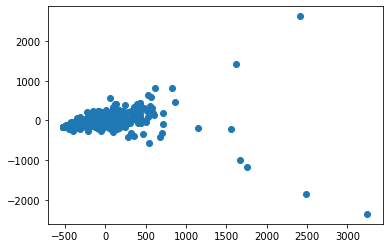

In [ ]:
plt.scatter(new_X[:, 0], new_X[:, 1])

In [ ]:
#Respuesta

#### Clustering Jerárquico Aglomerativo (1.5 Puntos)

1. Usando los datos anteriores, ejecute cada uno de los 4 métodos de clustering jerárquico: complete, single, average y ward, y visualice los dendrogramas formados. Adjunte el código necesario. No necesita generar los 4 dendrogramas en el mismo gráfico, pueden ser distintos.
<font size="-1"><b>Puntaje: 0.2 Puntos</b></font> 

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# Respuesta

In [ ]:
#Grafico 1

In [ ]:
#Grafico 2

In [ ]:
#Grafico 3

In [ ]:
#Grafico 4

2. Fijándose en el método `single`, a qué altura recomendaría cortar el árbol? <font size="-1"><b>Puntaje: 0.2 Puntos</b></font> 

**Respuesta:**



3. Ahora si miramos el método `ward`, cuántos clusters propone usar? A qué altura se debe cortar el arbol para obtener esa cantidad de clusters? <font size="-1"><b>Puntaje: 0.2 Puntos</b></font> 

**Respuesta:**

4. Implemente el código para asignar clusters a los datos siguiendo lo que usted propuso en la pregunta **2.** y **3.** y liste la asignación de clusters para cada punto del dataset para `single` y `ward`. Cuántos clusters se generan para el método `single` cortando a la altura que propuso en la pregunta **2.**? <font size="-1"><b>Puntaje: 0.4 Puntos</b></font> 

In [ ]:
#Respuesta

5. Cuántos datos quedan asignados a cada cluster? Agregue el código necesario para objener esta información para los métodos `single` y `ward`. <font size="-1"><b>Puntaje: 0.3 Puntos</b></font> 

In [ ]:
#Respuesta

6. Usando el dataset con dimensiones reducidas generado en la parte anterior: `new_X`, grafique los datos y pinte los datos con su asignacion de cluster para los métodos `single` y `ward` para tener una representación visual de los clusters. <font size="-1"><b>Puntaje: 0.2 Puntos</b></font> 

In [ ]:
#Respuesta

### Problema "libre" (2.0 Puntos)

En esta sección evaluaremos su manejo a la hora de enfrentar un problema "real", para ello se les entrega la base de datos "bankloan.csv" para la cual deben realizar 2 etapas fundamentales (+1 de bonus):
1. Analisis Exploratorio de Datos: Realice un análisis exploratorio de los datos (cantidad de registros, medias, medianas, missing values, etc) y muestre al menos 2 gráficos de variables que considere relevantes para el análisis.

**Nota**: Si solo muestra resultados y no realiza un análisis relevante de estos se dará **0 ptos**.

2. Limpieza de Datos: Cree una base de datos consistente para la utilización de algoritmos de clustering. Esto significa realizar `tratamiento de valores pérdidos, tratamiento de valores anómalos, transformaciones y selección de características`. Debe claramente expresar las **features** que utilizará para hacer clustering, las cuales deben ser **al menos 3**. **Justifique** las variables escogidas apoyándose en el análisis exploratorio del punto anterior.

**Nota**: Debe justificar cada acción realizada (o no realizada, ej: decidí no imputar por x razón) sobre los datos, sino las justifica se dara **0 ptos**.

3. Aplicación de modelos de clustering: Usando la base anterior, aplique los dos modelos vistos en este laboratorio, usando el siguiente flujo de trabajo:

      a. Identifique el número de clusters óptimo para K-Means.

      b. Ejecute el código para segmentar sus datos según el número de clusters identificados.

      c. Realice un análisis descriptivo de dichos clusters. (se recomienda utilizar visualizaciones)

      d. Realice clustering jerarquico "heredando" el número de clusters anterior.

      e. Repita el analisis descriptivo para estos clusters nuevos:

4. **(BONUS)** Interpretación de resultados: Interprete los resultados obtenidos en el punto 3. Comentando cosas como: ¿Que modelo era idoneo de utilizar? y ¿Que clusters arroja el modelo? (i.e. ¿como son los clientes de cada segmento?)


####Contexto

Una institución financiera tradicional le interesa caracterizar a los clientes que han contraído un crédito con el objetivo de ofrecer productos específicos a cada grupo. Para lo anterior cuenta con los siguientes datos:

|**Variable**|**Descripción**|
|--|--|
|`CUSTOMER_ID`|identificador único del cliente|
|`AGE`|edad del cliente al contraer el crédito|
|`EDUCATION`|nivel educacional  que declara el cliente al momento de solicitar el crédito|
|`NATIONALITY`|nacionalidad del cliente|
|`YRS_WORK`|número de años trabajando e la empresa que declara el cliente al momento de solicitar el crédito|
|`YRS_ADDRESS`|número de años viviendo en la misma morada al momento de solicitar el crédito|
|`INCOME`|ingreso en miles de dólares americanos|
|`DEBT_INCOME`|deuda en consumo en miles de dólares americanos|
|`CREDIT_DEBT`| deuda en tarjetas de credito en miles de dólares americanos|
|`OTHER_DEBT`|otras deudas en miles de dólares americanos|

#### Exploración del dataset (0.5 Puntos)

In [ ]:
#Respuesta

####Limpeza de datos (0.5 Puntos)

In [ ]:
#Respuesta

#### Aplicar modelos de clustering (1.0 Puntos)

In [ ]:
#modelo 1

In [ ]:
#modelo 2

**Bonus**
#### Interpretar resultados (1.0 Puntos)

**Respuesta:**